# 🚜 Bulldozer Price Prediction



<img src = "01.jpg" width = 800 height = 0 />

## Problem Statement :

    1. How well can we predict the future sale price of a bulldozer, given its characteristics and previous examples of how much similar bulldozers have been sold for?

## Description of Dataset :


The data for this competition is split into three parts:

* Train.csv is the training set, which contains data through the end of 2011.
* Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.
* Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.



## Dataset Source :

Data is collected from Kaggle compition. https://www.kaggle.com/c/bluebook-for-bulldozers/data

## Evaluation :

The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.

For more on the evaluation of this project check: https://www.kaggle.com/c/bluebook-for-bulldozers/overview/evaluation

Note: The goal for most regression evaluation metrics is to minimize the error. For example, our goal for this project will be to build a machine learning model which minimises RMSLE.

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objs as go
import plotly.offline as py

import warnings
warnings.filterwarnings('ignore')

## Importing the Dataset

In [2]:
data = pd.read_csv("TrainAndValid.csv")

In [3]:
data.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data.shape

(412698, 53)

## Summary of Data

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [6]:
data.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
SalesID,412698.0,NaN,NaN,NaN,2011161.163640,1080067.724498,1139246.0,1421897.75,1645852.5,2261012.50,6333349.0
SalePrice,412698.0,NaN,NaN,NaN,31215.181414,23141.743695,4750.0,14500.00,24000.0,40000.00,142000.0
MachineID,412698.0,NaN,NaN,NaN,1230061.436646,453953.257950,0.0,1088593.25,1284397.0,1478079.25,2486330.0
ModelID,412698.0,NaN,NaN,NaN,6947.201828,6280.824982,28.0,3261.00,4605.0,8899.00,37198.0
datasource,412698.0,NaN,NaN,NaN,135.169361,9.646749,121.0,132.00,132.0,136.00,173.0
auctioneerID,392562.0,NaN,NaN,NaN,6.585268,17.158409,0.0,1.00,2.0,4.00,99.0
YearMade,412698.0,NaN,NaN,NaN,1899.049637,292.190243,1000.0,1985.00,1995.0,2001.00,2014.0
MachineHoursCurrentMeter,147504.0,NaN,NaN,NaN,3522.988285,27169.928650,0.0,0.00,0.0,3209.00,2483300.0
UsageBand,73670,3,Medium,35832,NaN,NaN,NaN,NaN,NaN,NaN,NaN
saledate,412698,4013,2/16/2009 0:00,1932,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Total Missing values

In [7]:
data.isnull().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

In [8]:
data.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'saledate', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls'],
      dtype='object')

## Exploratory Data Analysis

Text(0.5, 1.0, 'Sale date with Sale Price')

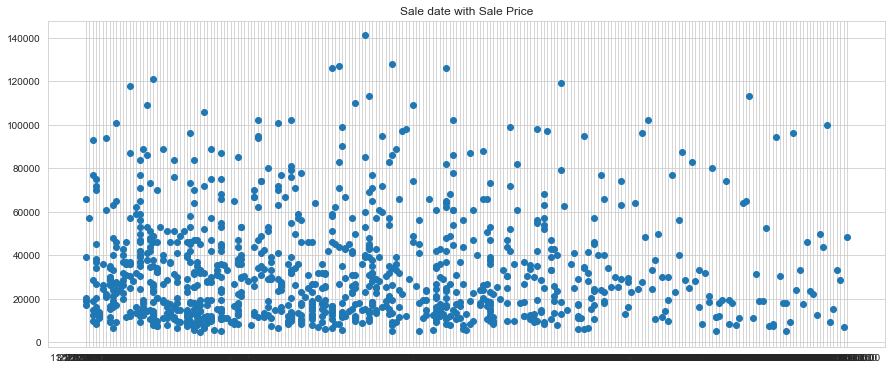

In [9]:
sns.set_style("whitegrid")
plt.figure(figsize = (15, 6))
plt.scatter(data["saledate"][:1000], data["SalePrice"][:1000]);
plt.title('Sale date with Sale Price')

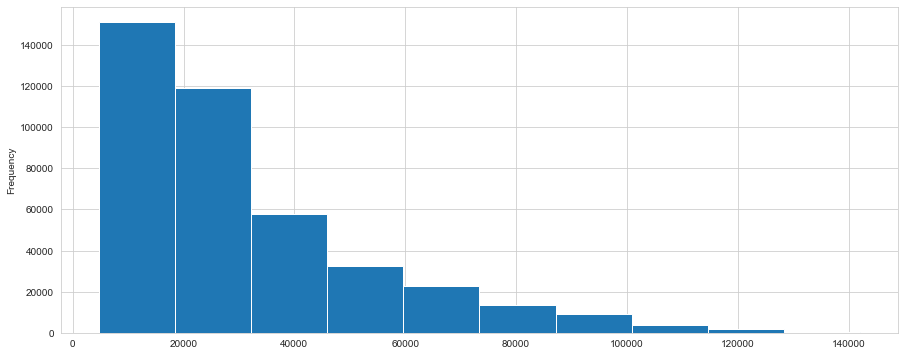

In [10]:
plt.figure(figsize = (15, 6))
data.SalePrice.plot.hist();

### Parsing dates

* When we work with time series data, we want to enrich the time & date component as much as possible.

* We can do that by telling pandas which of our columns has dates in it using the parse_dates parameter.

In [11]:
df = pd.read_csv("TrainAndValid.csv", low_memory = False, parse_dates = ["saledate"])

In [12]:
df.saledate.dtype

dtype('<M8[ns]')

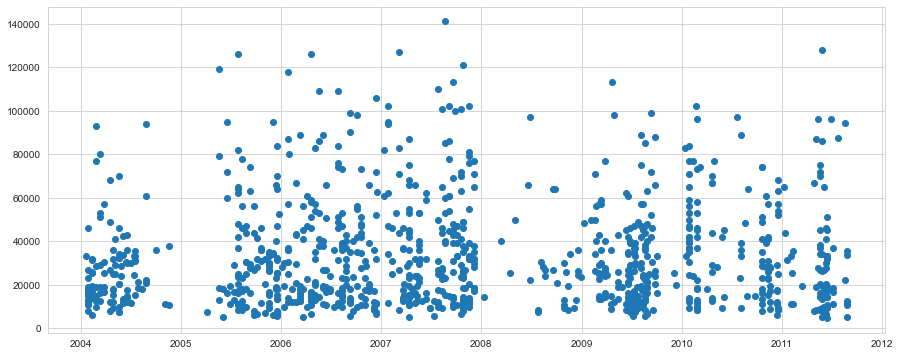

In [13]:
plt.figure(figsize = (15, 6))
plt.scatter(df["saledate"][:1000], df["SalePrice"][:1000]);

In [14]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Sort data frame by saledate for time series analysis

In [15]:
df.sort_values(by = ["saledate"], inplace = True, ascending = True)

### Make a copy of the original DataFrame

* We make a copy of the original dataframe so when we manipulate the copy, we've still got our original data.

In [16]:
df_tmp = df.copy()

### Add datetime derived columns from saledate column

In [17]:
df_tmp["saleYear"]      = df_tmp["saledate"].dt.year
df_tmp["saleMonth"]     = df_tmp["saledate"].dt.month
df_tmp["saleDay"]       = df_tmp["saledate"].dt.day
df_tmp["saleDayOfWeek"] = df_tmp["saledate"].dt.dayofweek
df_tmp["saleDayOfYear"] = df_tmp["saledate"].dt.dayofyear

In [18]:
df_tmp.drop(["saledate"], axis = 1, inplace = True)

In [19]:
# Checking values for different states in teh US
df_tmp.state.value_counts()

Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Iowa               1336
Montana            1336
Oklahoma           1326
Nebraska            866
West Virginia   

## Modeling

In [20]:
100 * df_tmp.isna().sum()/len(df_tmp)

SalesID                      0.000000
SalePrice                    0.000000
MachineID                    0.000000
ModelID                      0.000000
datasource                   0.000000
auctioneerID                 4.879113
YearMade                     0.000000
MachineHoursCurrentMeter    64.258610
UsageBand                   82.149174
fiModelDesc                  0.000000
fiBaseModel                  0.000000
fiSecondaryDesc             34.099269
fiModelSeries               85.784520
fiModelDescriptor           81.871490
ProductSize                 52.485110
fiProductClassDesc           0.000000
state                        0.000000
ProductGroup                 0.000000
ProductGroupDesc             0.000000
Drive_System                74.051970
Enclosure                    0.080931
Forks                       52.092087
Pad_Type                    80.349796
Ride_Control                62.992794
Stick                       80.349796
Transmission                54.444412
Turbocharged

In [21]:
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        df_tmp[label] = content.astype("category").cat.as_ordered()

In [22]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor       

In [23]:
df_tmp.state.cat.codes

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

In [24]:
100 * df_tmp.isna().sum()/len(df_tmp)

SalesID                      0.000000
SalePrice                    0.000000
MachineID                    0.000000
ModelID                      0.000000
datasource                   0.000000
auctioneerID                 4.879113
YearMade                     0.000000
MachineHoursCurrentMeter    64.258610
UsageBand                   82.149174
fiModelDesc                  0.000000
fiBaseModel                  0.000000
fiSecondaryDesc             34.099269
fiModelSeries               85.784520
fiModelDescriptor           81.871490
ProductSize                 52.485110
fiProductClassDesc           0.000000
state                        0.000000
ProductGroup                 0.000000
ProductGroupDesc             0.000000
Drive_System                74.051970
Enclosure                    0.080931
Forks                       52.092087
Pad_Type                    80.349796
Ride_Control                62.992794
Stick                       80.349796
Transmission                54.444412
Turbocharged

### Save Processed data

In [25]:
df_tmp.to_csv("train_tmp.csv", index = False)

## Fill Missing values

In [26]:
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth
saleDay
saleDayOfWeek
saleDayOfYear


In [27]:
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content) and pd.isnull(content).sum():
        print(label)

auctioneerID
MachineHoursCurrentMeter


In [28]:
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content) and pd.isnull(content).sum():
        df_tmp[label] = content.fillna(content.median())

In [29]:
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        df_tmp[label] = pd.Categorical(content).codes + 1

## Split train and validation data

In [30]:
df_val = df_tmp[df_tmp.saleYear == 2012]
df_train = df_tmp[df_tmp.saleYear != 2012]

len(df_val), len(df_train)

(11573, 401125)

In [31]:
X_train = df_train.drop("SalePrice", axis = 1)
y_train = df_train["SalePrice"]

X_valid = df_val.drop("SalePrice", axis = 1)
y_valid = df_val["SalePrice"]

## Building an Evaluation function

In [32]:
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

def rmsle(y_test, y_preds):
    """
    Calculate the root mean squared log error.
    """
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    scores = {"Training MAE" : mean_absolute_error(y_train, train_preds),
             "Valid MAE"     : mean_absolute_error(y_valid, val_preds),
             "Training RMSLE": rmsle(y_train, train_preds),
             "Valid RMSLE"   : rmsle(y_valid, val_preds),
             "Training R2"   : r2_score(y_train, train_preds),
             "Valid R2"      : r2_score(y_valid, val_preds)}
    return scores

## Tetsing model on a subset (to tune the hyperparameter)

In [33]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_jobs = -1, random_state = 42, max_samples = 10000)

In [34]:
model.fit(X_train, y_train)

RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [35]:
show_scores(model)

{'Training MAE': 5563.72867258336,
 'Valid MAE': 7168.9377352458305,
 'Training RMSLE': 0.2578202020674087,
 'Valid RMSLE': 0.2929702627803096,
 'Training R2': 0.8605936890077203,
 'Valid R2': 0.8322757239076886}

### Hyperparameter tuning with RandomizedSearchCV

In [36]:
from sklearn.model_selection import RandomizedSearchCV

rf_grid = {"n_estimators": np.arange(10,100,10),
          "max_depth": [None, 3,5,10],
          "min_samples_split": np.arange(2,20,2),
          "min_samples_leaf": np.arange(1,20,2),
          "max_features": [0.5,1,"sqrt", "auto"],
          "max_samples": [10000]}

In [37]:
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs = -1, random_state = 42), 
                              param_distributions = rf_grid, 
                              n_iter = 2, 
                              cv = 5, 
                              verbose = True)


# Fit model
rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=2,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [38]:
rs_model.best_params_

{'n_estimators': 10,
 'min_samples_split': 18,
 'min_samples_leaf': 15,
 'max_samples': 10000,
 'max_features': 'sqrt',
 'max_depth': 10}

In [39]:
show_scores(rs_model)

{'Training MAE': 9008.113292221055,
 'Valid MAE': 10469.050663978926,
 'Training RMSLE': 0.3938698872682395,
 'Valid RMSLE': 0.41421904357019707,
 'Training R2': 0.6762875577806631,
 'Valid R2': 0.6830453813917883}

#### After running RandomizedSearchCV with n_estimators = 90, below parameters are found.

In [40]:
%%time

# Most ideal model
ideal_model = RandomForestRegressor(n_estimators = 90, 
                                    min_samples_split = 14, 
                                    min_samples_leaf = 1, 
                                    max_features = 0.5, 
                                    n_jobs = -1, 
                                    max_samples = None, 
                                    random_state = 42)

ideal_model.fit(X_train, y_train)

Wall time: 1min 36s


RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=90,
                      n_jobs=-1, random_state=42)

In [41]:
show_scores(ideal_model)

{'Training MAE': 2924.2396741632906,
 'Valid MAE': 5928.781387683088,
 'Training RMSLE': 0.14323860948771414,
 'Valid RMSLE': 0.24546327264353307,
 'Training R2': 0.9597859696564593,
 'Valid R2': 0.8828942559050019}

### Make predictions on test data

In [42]:
df_test = pd.read_csv("Test.csv", low_memory = False, parse_dates = ["saledate"])
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


## Preprocessing the test data set

In [43]:
df_test["saleYear"]      = df_test["saledate"].dt.year
df_test["saleMonth"]     = df_test["saledate"].dt.month
df_test["saleDay"]       = df_test["saledate"].dt.day
df_test["saleDayOfWeek"] = df_test["saledate"].dt.dayofweek
df_test["saleDayOfYear"] = df_test["saledate"].dt.dayofyear


df_test.drop("saledate", axis = 1, inplace = True)

In [44]:
for label, content in df_test.items():
    if pd.api.types.is_numeric_dtype(content) and pd.isnull(content).sum():
        df_test[label] = content.fillna(content.median())

In [45]:
df_test.isnull().sum()

SalesID                         0
MachineID                       0
ModelID                         0
datasource                      0
auctioneerID                    0
YearMade                        0
MachineHoursCurrentMeter        0
UsageBand                   10623
fiModelDesc                     0
fiBaseModel                     0
fiSecondaryDesc              3975
fiModelSeries               10451
fiModelDescriptor            9433
ProductSize                  6409
fiProductClassDesc              0
state                           0
ProductGroup                    0
ProductGroupDesc                0
Drive_System                 9698
Enclosure                       2
Forks                        6149
Pad_Type                    10349
Ride_Control                 8216
Stick                       10349
Transmission                 7639
Turbocharged                10349
Blade_Extension             11806
Blade_Width                 11806
Enclosure_Type              11806
Engine_Horsepo

In [46]:
for label, content in df_test.items():
    if pd.api.types.is_string_dtype(content):
        df_test[label] = content.astype("category").cat.as_ordered()

In [47]:
for label, content in df_test.items():
    if not pd.api.types.is_numeric_dtype(content):
        df_test[label] = pd.Categorical(content).codes + 1

In [48]:
X_train.shape

(401125, 56)

In [49]:
df_test.shape

(12457, 56)

## Prediction on test data

In [50]:
test_preds = ideal_model.predict(df_test)

In [51]:
test_preds

array([17774.92978678, 17863.22950448, 45090.22177098, ...,
       13216.75747132, 16570.25105126, 27528.22737316])

## Output

In [52]:
df_preds = pd.DataFrame()
df_preds["SalesId"] = df_test["SalesID"]
df_preds["SalesPrice"] = test_preds
df_preds.head()

,SalesId,SalesPrice
0,1227829,17774.929787
1,1227844,17863.229504
2,1227847,45090.221771
3,1227848,62940.990968
4,1227863,56805.131127


In [53]:
df_preds.to_csv("test_prediction.csv", index = False)

## Feature Importance

In [54]:
ideal_model.feature_importances_

array([0.03462386, 0.01862766, 0.04534493, 0.00194843, 0.00336891,
       0.19620491, 0.00337724, 0.00114446, 0.04258705, 0.04991614,
       0.06650426, 0.00567177, 0.02723435, 0.16589931, 0.04876991,
       0.00601633, 0.00428341, 0.00392899, 0.00263444, 0.07263094,
       0.00066457, 0.00115412, 0.0011102 , 0.00032553, 0.00120379,
       0.00093664, 0.00397495, 0.00706368, 0.00110511, 0.00246618,
       0.00861166, 0.00429103, 0.00498457, 0.00181473, 0.00237503,
       0.0149855 , 0.00136189, 0.01940327, 0.00389675, 0.00866324,
       0.00121679, 0.00091942, 0.00175451, 0.00061707, 0.00046983,
       0.00050186, 0.00061597, 0.00412519, 0.00108587, 0.00042526,
       0.00059769, 0.07406821, 0.00381009, 0.00571009, 0.00294469,
       0.01002772])

In [55]:
def plot_features(columns, importance, n = 20):
    df = (pd.DataFrame({"features":columns,
                       "importances": importance})
         .sort_values(by="importances", ascending = False).reset_index(drop = True))
    
    # plotting
    fig, ax = plt.subplots()
    ax.barh(df["features"][:n], df["importances"][:n])
    ax.set_ylabel("Features")
    ax.set_xlabel("Importance")
    ax.invert_yaxis()

<Figure size 1080x432 with 0 Axes>

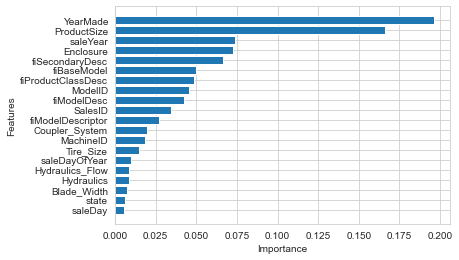

In [56]:
plt.figure(figsize = (15, 6))
plot_features(df_test.columns, ideal_model.feature_importances_)

In [57]:
sum(ideal_model.feature_importances_)

0.9999999999999998

In [58]:
df.ProductSize.isna().sum()

216605

In [59]:
df.ProductSize.value_counts()

Medium            64342
Large / Medium    51297
Small             27057
Mini              25721
Large             21396
Compact            6280
Name: ProductSize, dtype: int64

In [60]:
df.Turbocharged.value_counts()

None or Unspecified    77111
Yes                     3985
Name: Turbocharged, dtype: int64

In [61]:
df.Thumb.value_counts()

None or Unspecified    85074
Manual                  9678
Hydraulic               7580
Name: Thumb, dtype: int64

In [62]:
df["Enclosure"].value_counts()

OROPS                  177971
EROPS                  141769
EROPS w AC              92601
EROPS AC                   18
NO ROPS                     3
None or Unspecified         2
Name: Enclosure, dtype: int64